# Importing

In [38]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
df_train=df
# Check the percentage of missing values.
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'missing_ratio'])
missing_data

,Total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [40]:

# Delete features (columns) that have 5 or more missing values.
pct_null = df.isnull().sum()
missing_features = pct_null[pct_null >= 5].index
df.drop(missing_features, axis=1, inplace=True)

# Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.
df.dropna(axis=0, thresh=5, inplace=True)



In [41]:

numerical_feats = df.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print(df[numerical_feats].columns)
print("-"*80)
categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print(df[categorical_feats].columns)



Number of Numerical features:  35
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
--------------------------------------------------------------------------------
Number of Categorical features:  28
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'He

In [42]:

# Flow of regression problem

# we will use only two explanatory variables (features), GrLivArea and YearBuilt, in order to prioritize the practice of learning and evaluation of regression problems.
print('-'*30,' Flow of regression problem','-'*30)
#  [Problem 1] Feature selection for practice 
print('---------------------------------- Problem 1-------------------------------------')
X = pd.DataFrame(df, columns = ['GrLivArea','YearBuilt'])
y = pd.DataFrame(df, columns = ['SalePrice'])
print(X)
print(y)

# 75% of the data will be the training data, and 25% will be the test data to verify our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



------------------------------  Flow of regression problem ------------------------------
---------------------------------- Problem 1-------------------------------------
      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]


# Estimation and evaluation by linear regression

---------------------------------- Problem 2-------------------------------------
Coefficients: 
 [[  98.588892   1041.18622755]]
Mean squared error: 2725908099.06
Coefficient of determination: 0.59


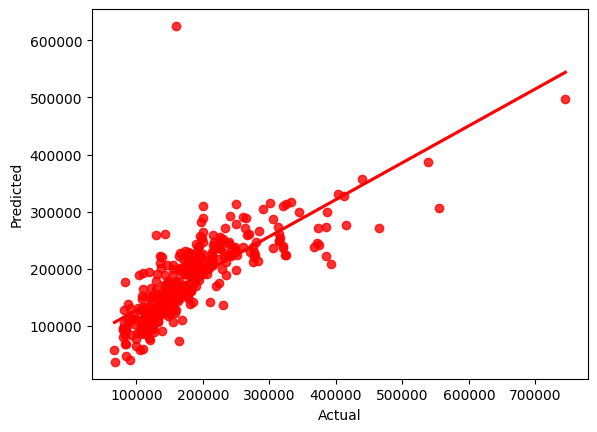

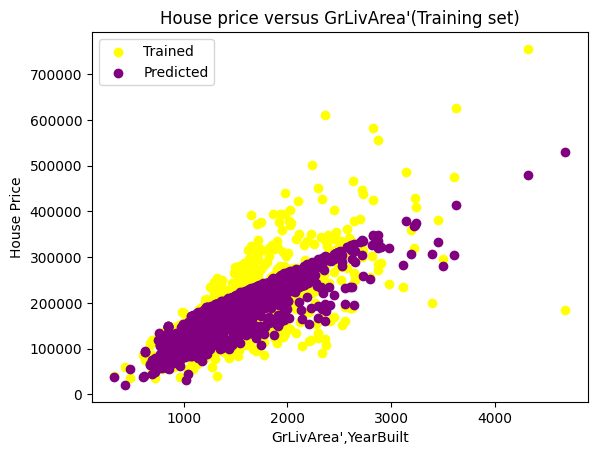

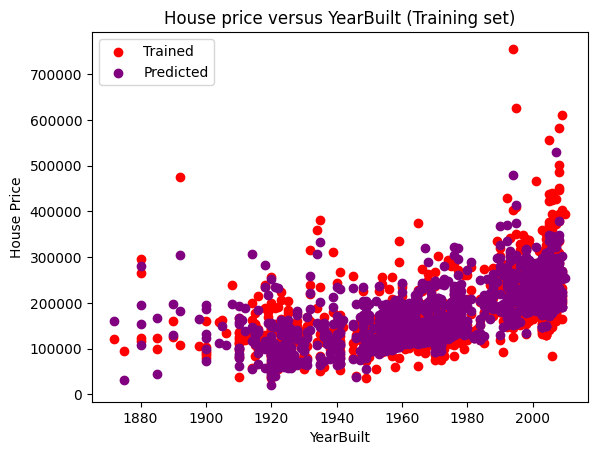

In [43]:

# [Problem 2] Estimation and evaluation by linear regression
# ----------------------------------------------------------
print('---------------------------------- Problem 2-------------------------------------')

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "yellow")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "purple")
plt.title("House price versus GrLivArea'(Training set)")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "purple")
plt.title("House price versus YearBuilt (Training set)")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()


# Linear regression


---------------------------------- Problem 3: Linear regression------------------
Coefficients: 
 [[  98.588892   1041.18622755]]
Mean squared error: 2725908099.06
Coefficient of determination: 0.59
0.6769659997783973


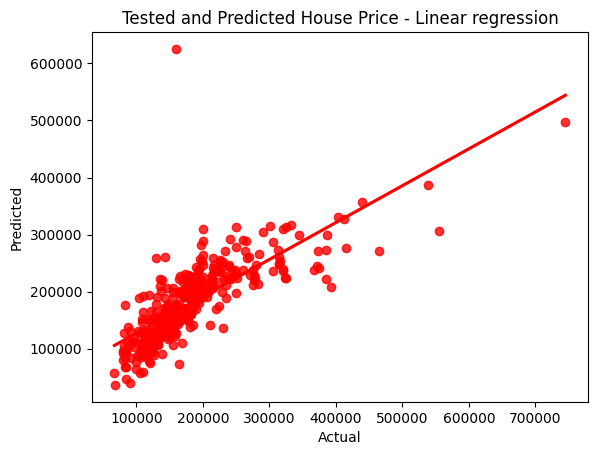

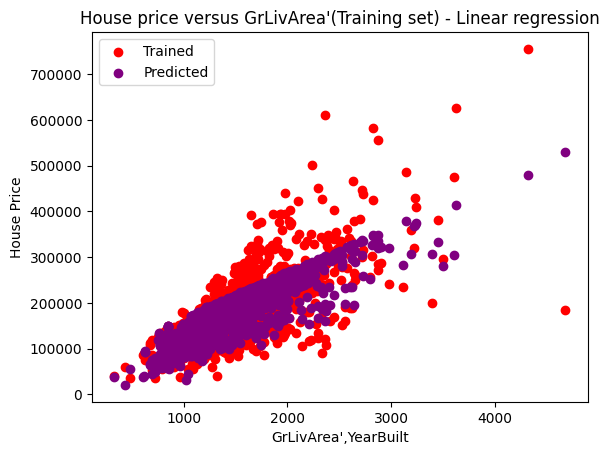

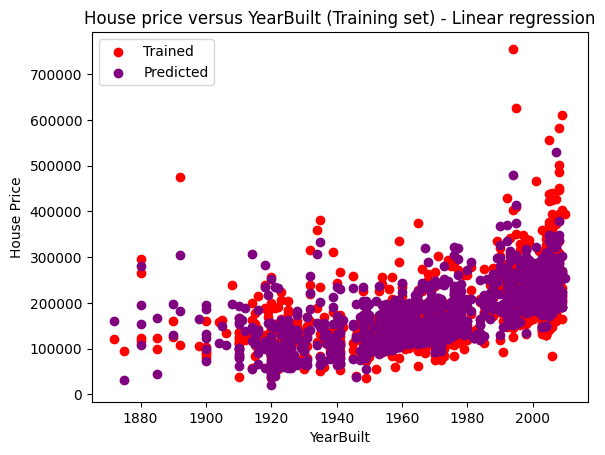

In [44]:

print('---------------------------------- Problem 3: Linear regression------------------')
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

print(model.score(X_train, y_train))

# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - Linear regression")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "purple")
plt.title("House price versus GrLivArea'(Training set) - Linear regression")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "purple")
plt.title("House price versus YearBuilt (Training set) - Linear regression")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()



# SVM

---------------------------------- Problem 3: SVM -------------------------------


/home/mauro/Workspace/AIDataScienceCourse/aienv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0365296803652968


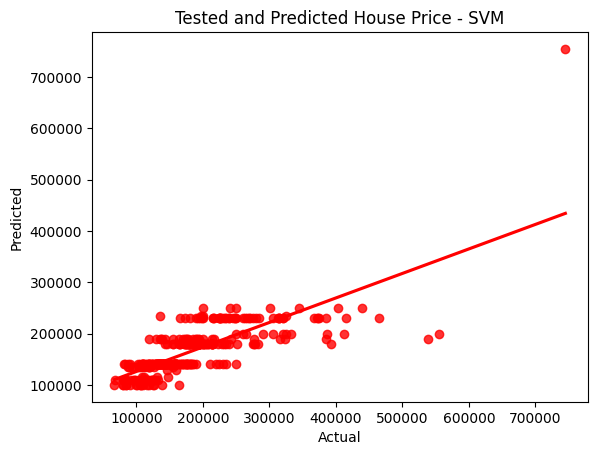

In [ ]:

print('---------------------------------- Problem 3: SVM -------------------------------')
# Create SVM object
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

print(model.score(X_train, y_train, sample_weight=None))


# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - SVM")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "purple")
plt.title("House price versus GrLivArea'(Training set) - SVM")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "purple")
plt.title("House price versus YearBuilt (Training set) - SVM")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()


# Decision tree

In [ ]:

# -------------
print('---------------------------------- Problem 3: Decision tree ---------------------')
# Create Decision tree object
model = DecisionTreeClassifier(random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

print(model.score(X_train, y_train, sample_weight=None))


# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - Decision tree")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "purple")
plt.title("House price versus GrLivArea'(Training set) - Decision tree")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "purple")
plt.title("House price versus YearBuilt (Training set) - Decision tree")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()


# Random forest

In [ ]:


print('---------------------------------- Problem 3: Random forest ---------------------')
# Create Random forest object
X_test, y_test = make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model = RandomForestClassifier(max_depth=2, random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train.values.ravel())

# Make predictions using the testing set
y_pred = model.predict(X_test)

print(model.score(X_train, y_train, sample_weight=None))

clf = RandomForestClassifier(max_depth=2, random_state=0)


# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - Random forest")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "purple")
plt.title("House price versus GrLivArea'(Training set) - Random forest")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "purple")
plt.title("House price versus YearBuilt (Training set) - Random forest")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()



# [Problem 4] (Advance assignment) Learning using other features

In [ ]:
print('---------------------------------- Problem 4-------------------------------------')
X2 = pd.DataFrame(df, columns = ['GrLivArea','YearBuilt','GarageCars','GarageArea'])
y2 = pd.DataFrame(df, columns = ['SalePrice'])
# 75% of the data will be the training data, and 25% will be the test data to verify our model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)


# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X2_train, y2_train)

# Make predictions using the testing set
y2_pred = model.predict(X2_test)

# The coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y2_test, y2_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y2_test, y2_pred))

# Plot outputs
sns.regplot(x=y2_test,y=y2_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

plt.scatter(X2_train['GrLivArea'], y2_train, color = "red")
plt.scatter(X2_train['GrLivArea'], model.predict(X2_train), color = "purple")
plt.title("House price versus GrLivArea'(Training set)")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X2_train['YearBuilt'], y2_train, color = "red")
plt.scatter(X2_train['YearBuilt'], model.predict(X2_train), color = "purple")
plt.title("House price versus YearBuilt (Training set)")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X2_train['GarageCars'], y2_train, color = "red")
plt.scatter(X2_train['GarageCars'], model.predict(X2_train), color = "purple")
plt.title("House price versus GarageCars (Training set)")
plt.xlabel("GarageCars")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X2_train['GarageArea'], y2_train, color = "red")
plt.scatter(X2_train['GarageArea'], model.predict(X2_train), color = "purple")
plt.title("House price versus GarageArea (Training set)")
plt.xlabel("GarageArea")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

# Increasing the number of feature from 2 to 4 (inclding two of the high correlation ceofficients) slightly increased 
# the Coefficient of determination from 0.59 to 0.61
